# Group 3-B Multivariate analysis of FX equilibrium
#### Micheal Lucky (smgmol56@gmail.com) 
#### Yonas Menghis Berhe (yonix500@gmail.com)
#### Boluwatife Adeyeye (adeyeyebolu027@gmail.com)
#### Muhammed Jamiu Saka (sakasim_jay@yahoo.com)
#### Sola-Aremu Oluwapelumi (solaaremu.pelumi@gmail.com)

In [1]:
#import the necessary libraries
library(readxl)
library(vars)
library(timeSeries)
library(tidyverse)
library(stats)
library(tseries)
library(forecast)
library(tsDyn)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Warning message:
"package 'timeSeries' was built under R version 3.6.3"Loading required package: timeDate
Warning message:
"package 'timeDate' was built under R version 3.6.2"
Attaching package: 'timeSeries'

The followin

### Equlibrium of US and Japan exchange rate using CPI and Interest rate of both countries. Data obtain from FRED

In [3]:
JPY_USD <- read_excel("DEXJPUS (3).xls", col_types = c("date", "numeric"), skip = 10)
JPY_CPI <- read_excel("JPNCPIALLMINMEI.xls", col_types = c("date", "numeric"), skip = 10)
JPY_IR <- read_excel("IRLTLT01JPM156N.xls", col_types = c("date", "numeric"), skip = 10)
US_CPI <- read_excel("CPIAUCSL.xls", col_types = c("date", "numeric"), skip = 10)
US_IR <- read_excel("IRLTLT01USM156N.xls", col_types = c("date", "numeric"), skip =10)

### Visualising the different Data

#### Plot of Japan and US foreign exchange rate

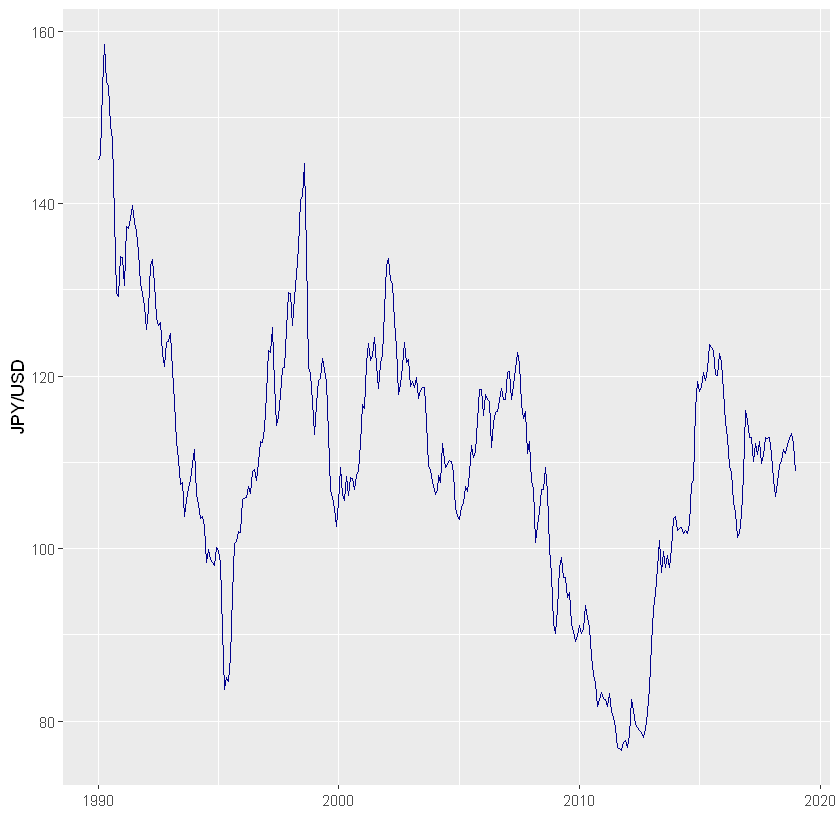

In [5]:
ggplot(data = JPY_USD, mapping = aes(x=observation_date,y=DEXJPUS))+ geom_line(color ="darkblue") + labs(x="",y="JPY/USD")

#### Plot of Consumer Price Index of all Items in Japan

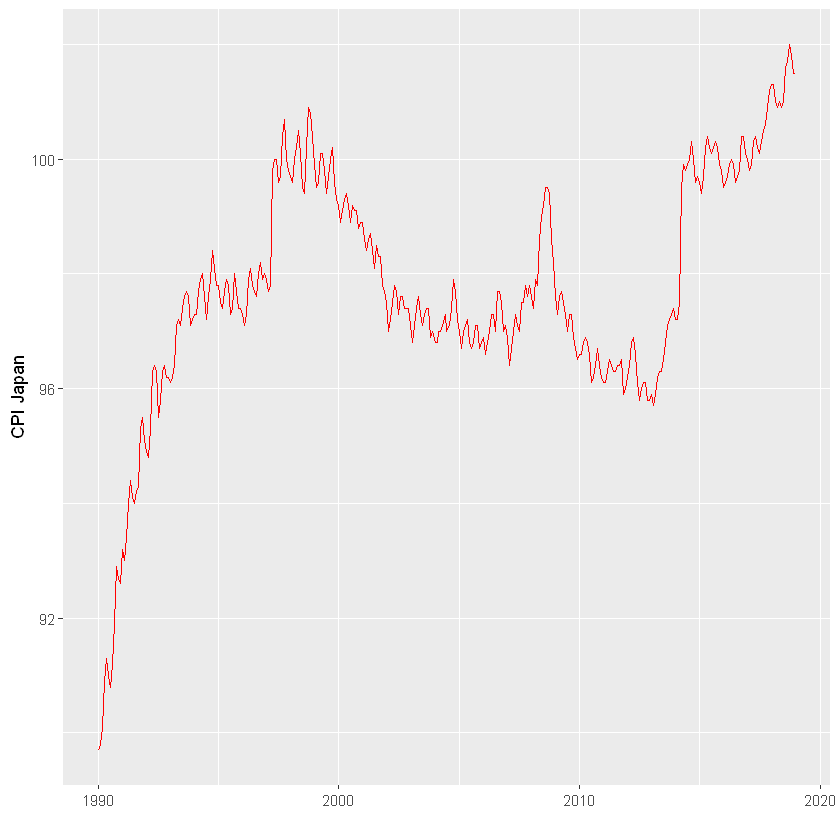

In [6]:
ggplot(data = JPY_CPI, mapping = aes(x=observation_date,y=JPNCPIALLMINMEI))+ geom_line(color ="red") + labs(x="",y="CPI Japan")

#### Plot of Long Term Government Bond Yields Japan

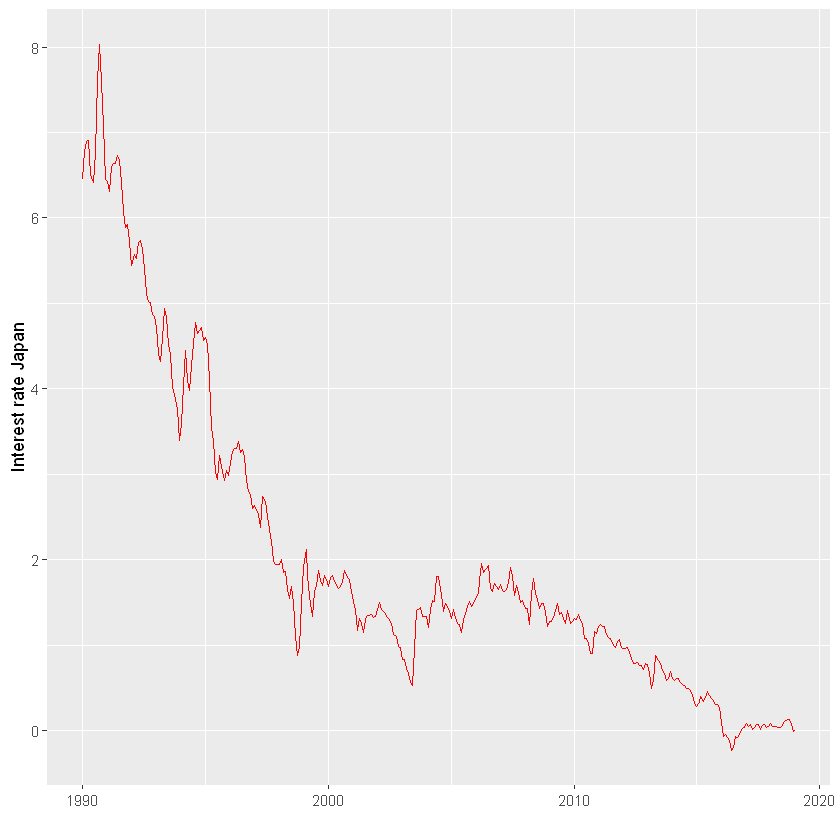

In [8]:
ggplot(data = JPY_IR, mapping = aes(x=observation_date,y=IRLTLT01JPM156N))+ geom_line(color ="red") + labs(x="",y="Interest rate Japan")

#### Plot of Consumer Price Index for all Items in US

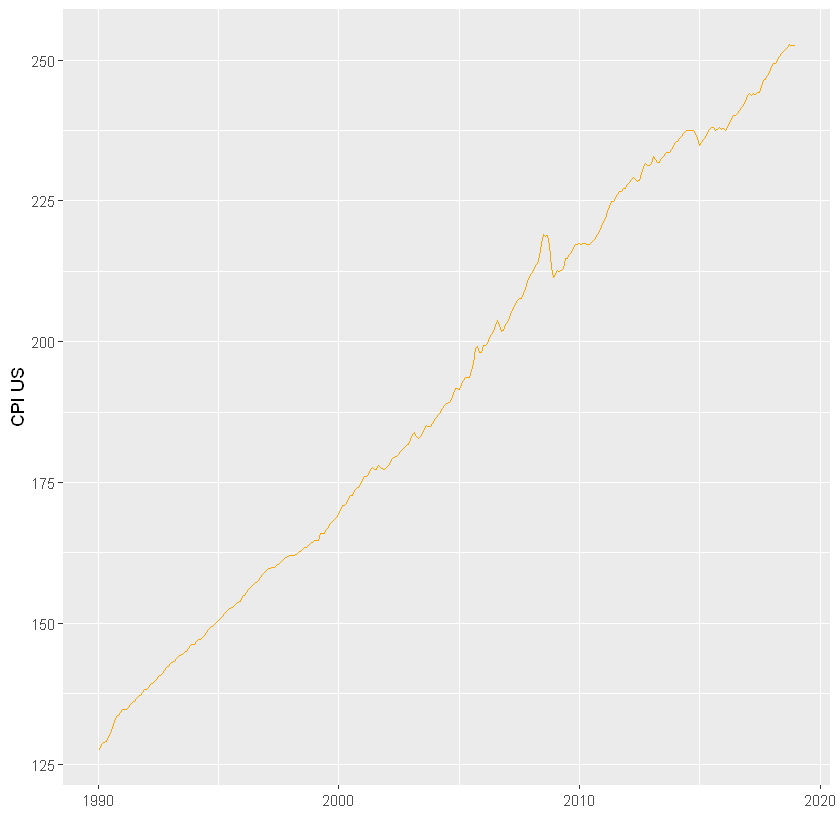

In [10]:
ggplot(data = US_CPI, mapping = aes(x=observation_date,y=CPIAUCSL))+ geom_line(color ="orange") + labs(x="",y="CPI US")

#### Plot of Long Term Government Bond Yields in US

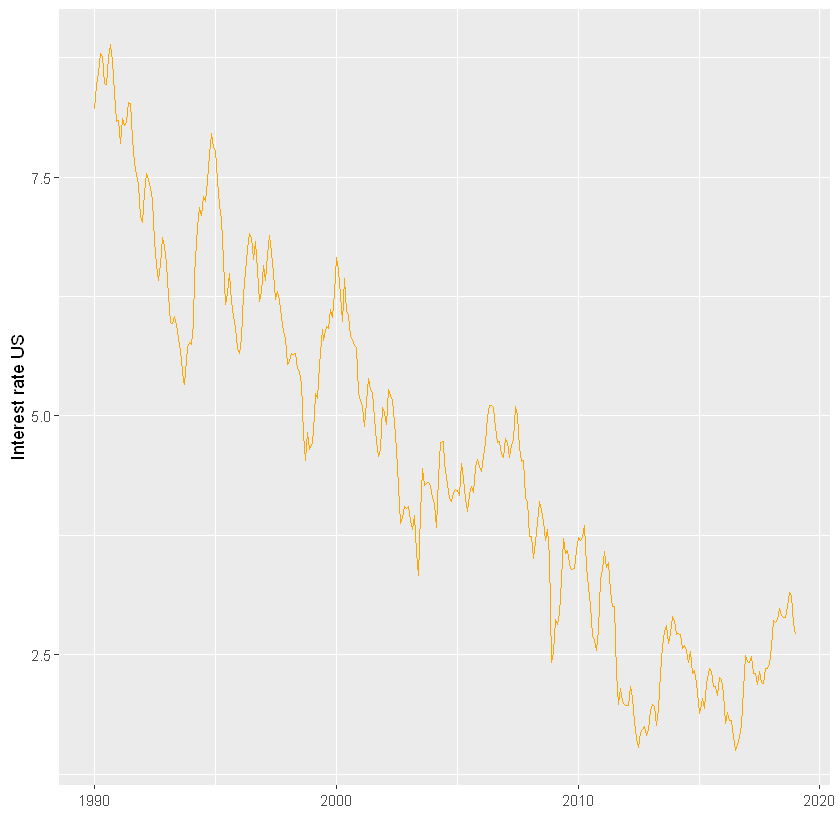

In [12]:
ggplot(data = US_IR, mapping = aes(x=observation_date,y=IRLTLT01USM156N))+ geom_line(color ="orange") + labs(x="",y="Interest rate US")

#### All plots display evidence of non-stationarity. This requires a first difference to be carried out as well as initial correlation examination

In [13]:
# differencing data of level 1
JPY_USD <- diff(JPY_USD$DEXJPUS,trim=TRUE)
JPY_CPI <- diff(JPY_CPI$JPNCPIALLMINMEI,trim=TRUE)
JPY_IR <- diff(JPY_IR$IRLTLT01JPM156N,trim=TRUE)
US_CPI <- diff(US_CPI$CPIAUCSL,trim=TRUE)
US_IR <- diff(US_IR$IRLTLT01USM156N,trim=TRUE)
# compiling the data in one data frame
data <- cbind(JPY_USD, JPY_CPI, JPY_IR, US_CPI, US_IR)
#data <- cbind(JPY_USD,JPY_IR, US_IR)
head(data)

JPY_USD,JPY_CPI,JPY_IR,US_CPI,US_IR
0.7112531,0.1,0.329,0.5,0.26
7.6150239,0.3,0.121,0.6,0.12
5.1503896,0.8,0.007,0.3,0.20
-4.4144805,0.4,-0.398,0.2,-0.03
-0.3483766,-0.3,-0.087,0.8,-0.28
-4.6561905,-0.2,0.351,0.6,-0.01


#### Examining for correlation among variables}

In [14]:
cor(data)

,JPY_USD,JPY_CPI,JPY_IR,US_CPI,US_IR
JPY_USD,1.000000000,-0.07717107,0.06824398,-0.004709053,0.30202885
JPY_CPI,-0.077171072,1.00000000,-0.06219357,0.183145164,0.07668705
JPY_IR,0.068243980,-0.06219357,1.00000000,0.096317360,0.38294392
US_CPI,-0.004709053,0.18314516,0.09631736,1.000000000,0.19363346
US_IR,0.302028854,0.07668705,0.38294392,0.193633456,1.00000000


#### It is evident that the JPY/USD exchange rate has a strong correlation with US interest rate and weak correlation with Japanese Interest rate

### Building a VAR model for 12 Lags

In [15]:
VAR_model = VAR(data, lag.max=12, type = "none", ic = "AIC")
summary(VAR_model)


VAR Estimation Results:
Endogenous variables: JPY_USD, JPY_CPI, JPY_IR, US_CPI, US_IR 
Deterministic variables: none 
Sample size: 345 
Log Likelihood: -848.614 
Roots of the characteristic polynomial:
0.7688 0.6741 0.6741 0.6513 0.6513 0.5532 0.5532 0.5028 0.5007 0.5007 0.4765 0.4765 0.4192 0.4192 0.2726
Call:
VAR(y = data, type = "none", lag.max = 12, ic = "AIC")


Estimation results for equation JPY_USD: 
JPY_USD = JPY_USD.l1 + JPY_CPI.l1 + JPY_IR.l1 + US_CPI.l1 + US_IR.l1 + JPY_USD.l2 + JPY_CPI.l2 + JPY_IR.l2 + US_CPI.l2 + US_IR.l2 + JPY_USD.l3 + JPY_CPI.l3 + JPY_IR.l3 + US_CPI.l3 + US_IR.l3 

           Estimate Std. Error t value Pr(>|t|)    
JPY_USD.l1  0.25247    0.05796   4.356 1.77e-05 ***
JPY_CPI.l1 -1.44126    0.46909  -3.072  0.00230 ** 
JPY_IR.l1  -3.15756    1.05842  -2.983  0.00306 ** 
US_CPI.l1   0.29427    0.29590   0.994  0.32072    
US_IR.l1    1.41095    0.81636   1.728  0.08486 .  
JPY_USD.l2  0.08272    0.05911   1.399  0.16265    
JPY_CPI.l2  0.97522    0.47200

#### The VAR model displays a significant effect of US and Japanese CPI and IR with the JPY/USD exchange rate

### Implementing the Granger causality test

#### Granger Casuality test for Japanese CPI

In [17]:
causality(VAR_model, cause="JPY_CPI")$Granger


	Granger causality H0: JPY_CPI do not Granger-cause JPY_USD JPY_IR
	US_CPI US_IR

data:  VAR object VAR_model
F-Test = 1.8803, df1 = 12, df2 = 1650, p-value = 0.0325


#### Granger Causality test for Japanese Interest rate

In [18]:
causality(VAR_model, cause="JPY_IR")$Granger


	Granger causality H0: JPY_IR do not Granger-cause JPY_USD JPY_CPI
	US_CPI US_IR

data:  VAR object VAR_model
F-Test = 3.2316, df1 = 12, df2 = 1650, p-value = 0.0001298


#### Granger Causality test for US CPI

In [19]:
causality(VAR_model, cause="US_CPI")$Granger


	Granger causality H0: US_CPI do not Granger-cause JPY_USD JPY_CPI
	JPY_IR US_IR

data:  VAR object VAR_model
F-Test = 2.774, df1 = 12, df2 = 1650, p-value = 0.0009485


#### Granger Causality test for US IR

In [20]:
causality(VAR_model, cause="US_IR")$Granger


	Granger causality H0: US_IR do not Granger-cause JPY_USD JPY_CPI
	JPY_IR US_CPI

data:  VAR object VAR_model
F-Test = 1.7436, df1 = 12, df2 = 1650, p-value = 0.05254


#### Granger Causality test for JPY/USD

In [21]:
causality(VAR_model, cause="JPY_USD")$Granger


	Granger causality H0: JPY_USD do not Granger-cause JPY_CPI JPY_IR
	US_CPI US_IR

data:  VAR object VAR_model
F-Test = 0.91659, df1 = 12, df2 = 1650, p-value = 0.5293


#### Using Granger Causality test we can see that Japanese CPI,  Japanese interest rate and US CPI have the most causal effect for these estimations

### Plotting the VAR model

#### JPY/USD foreign exchange data shows a stationary process according to the ACF and PACF

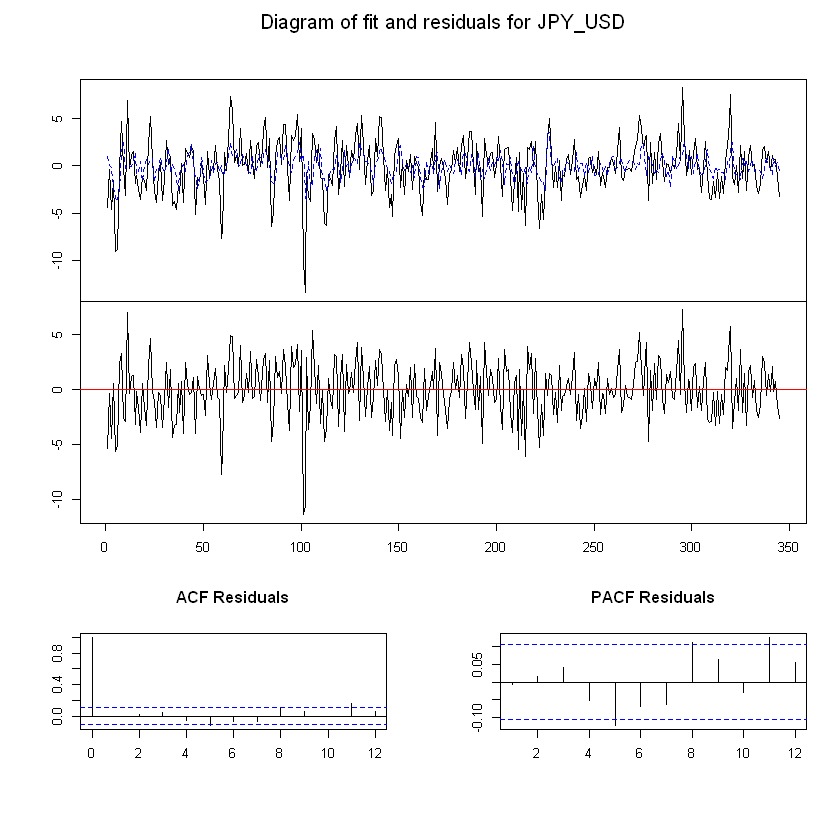

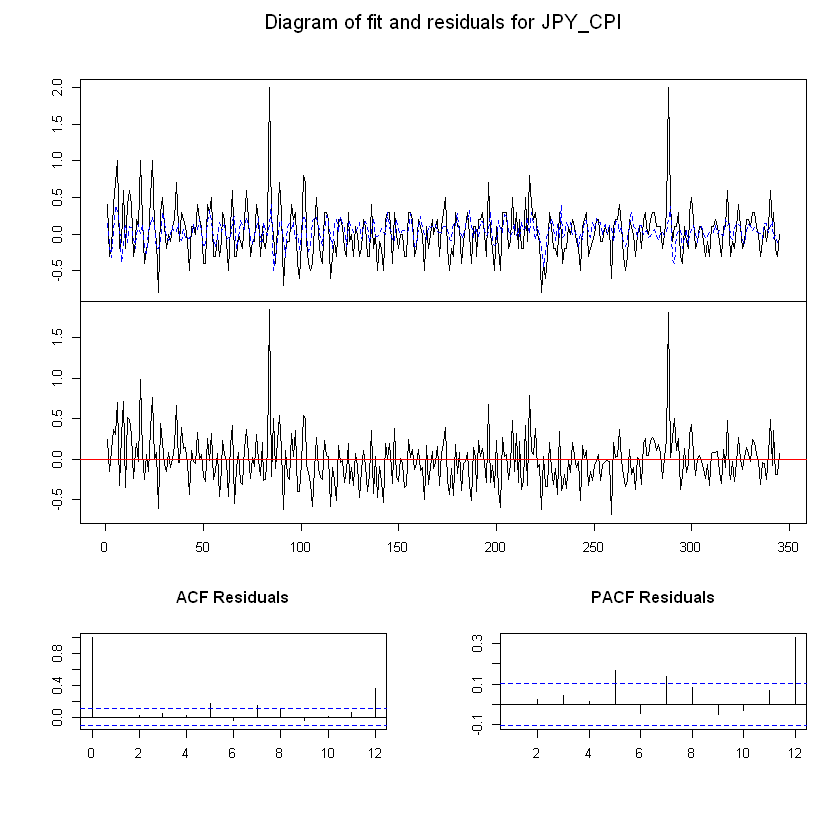

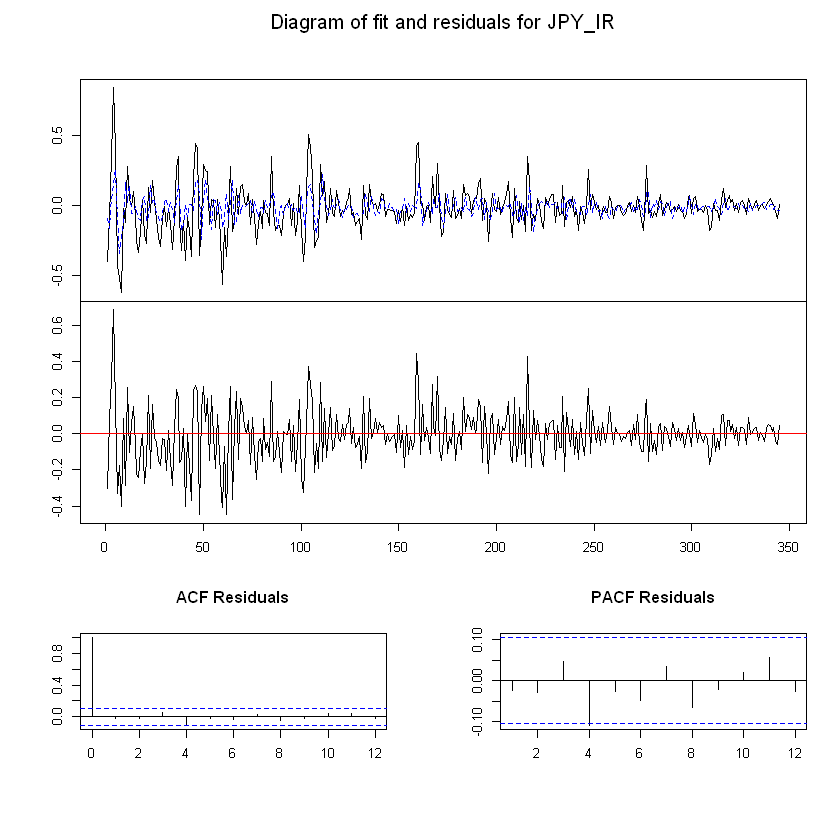

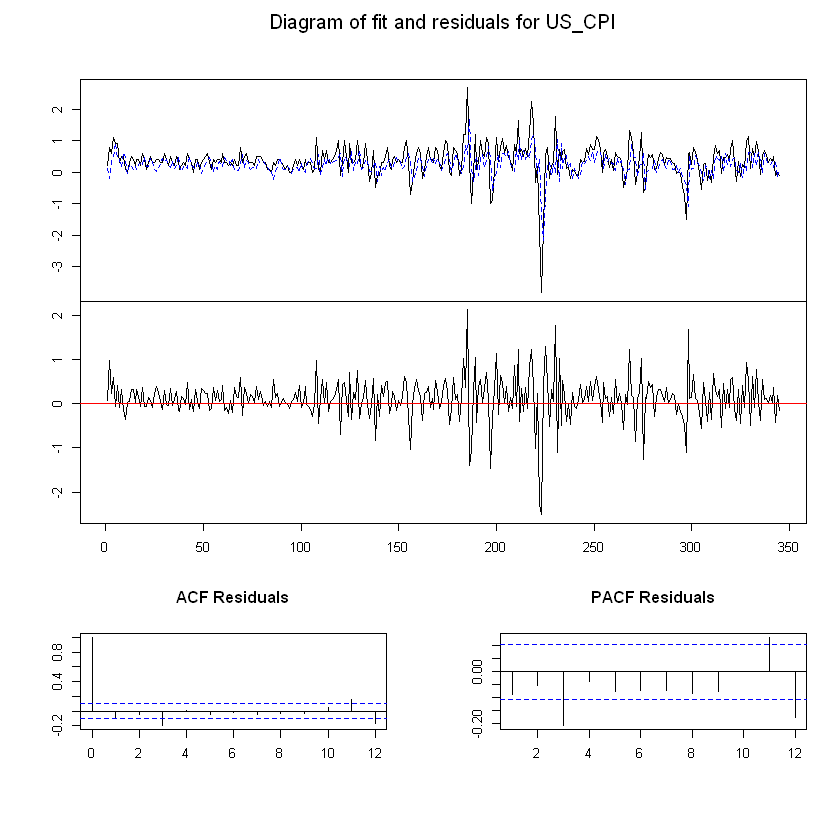

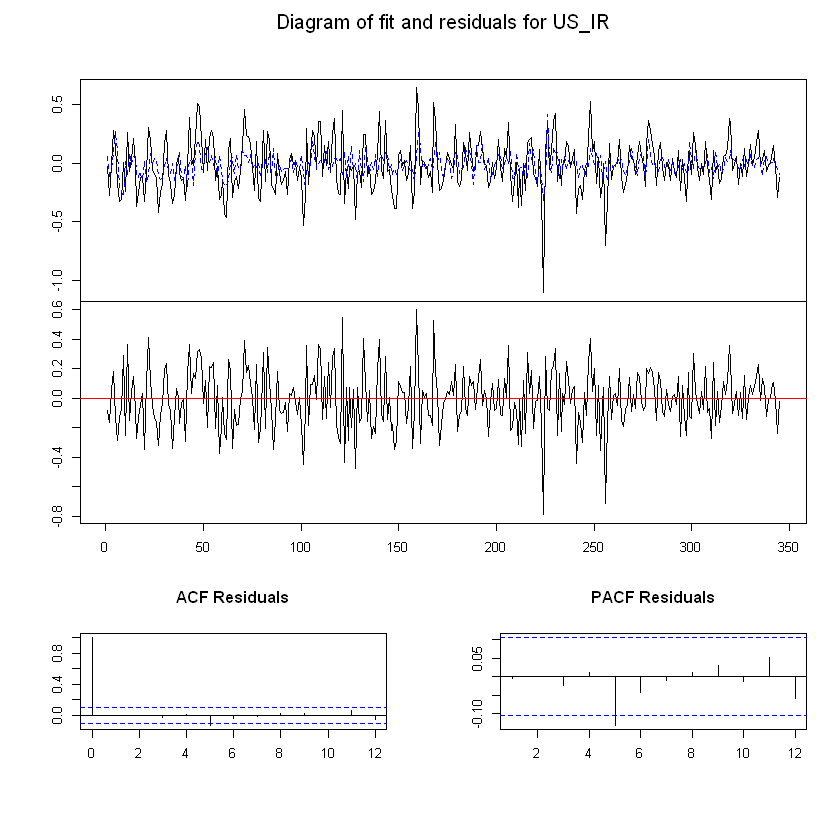

In [22]:
plot(VAR_model)

### Impulse response functions

#### We can see the impulse function of JPY/USD responds to its own innovation positively but the respose to other innovation seems to ocillate between positive and negative but mostly negative and finally returns to its mean in the longrun.

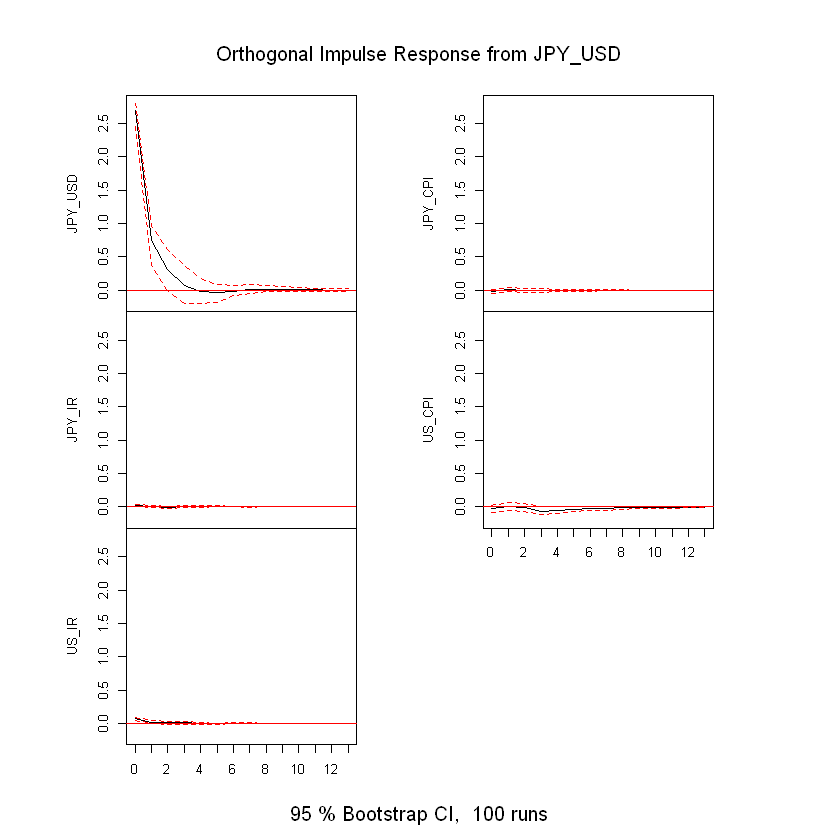

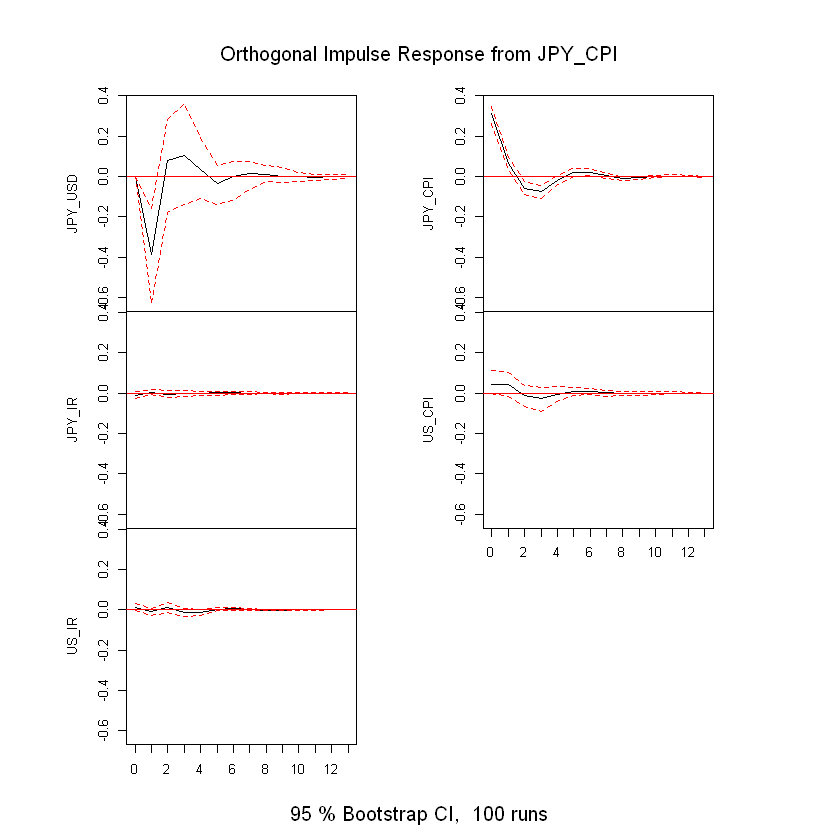

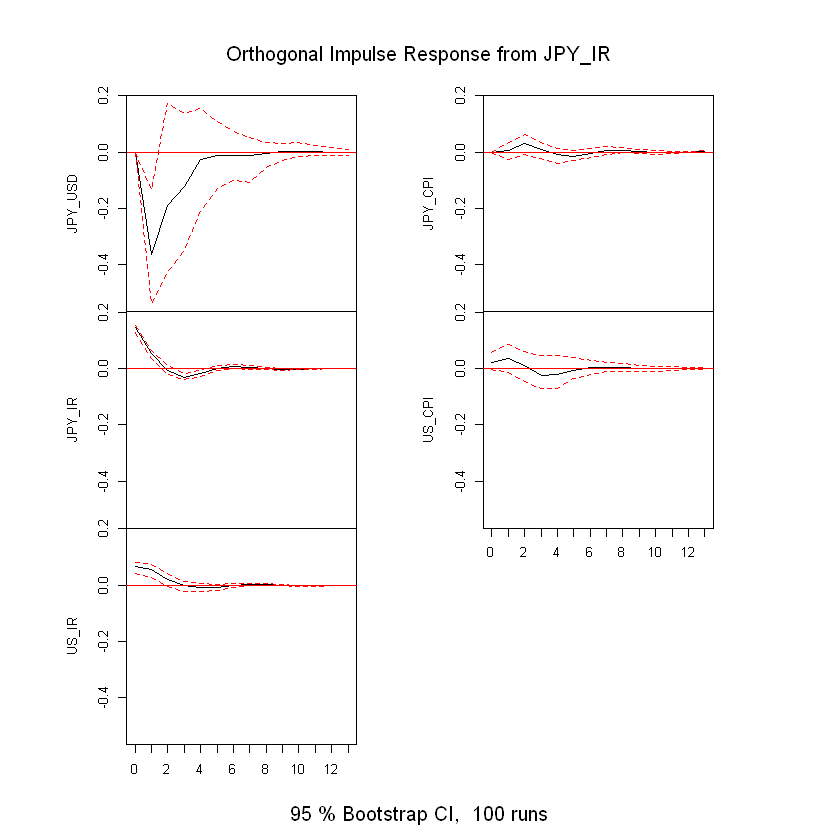

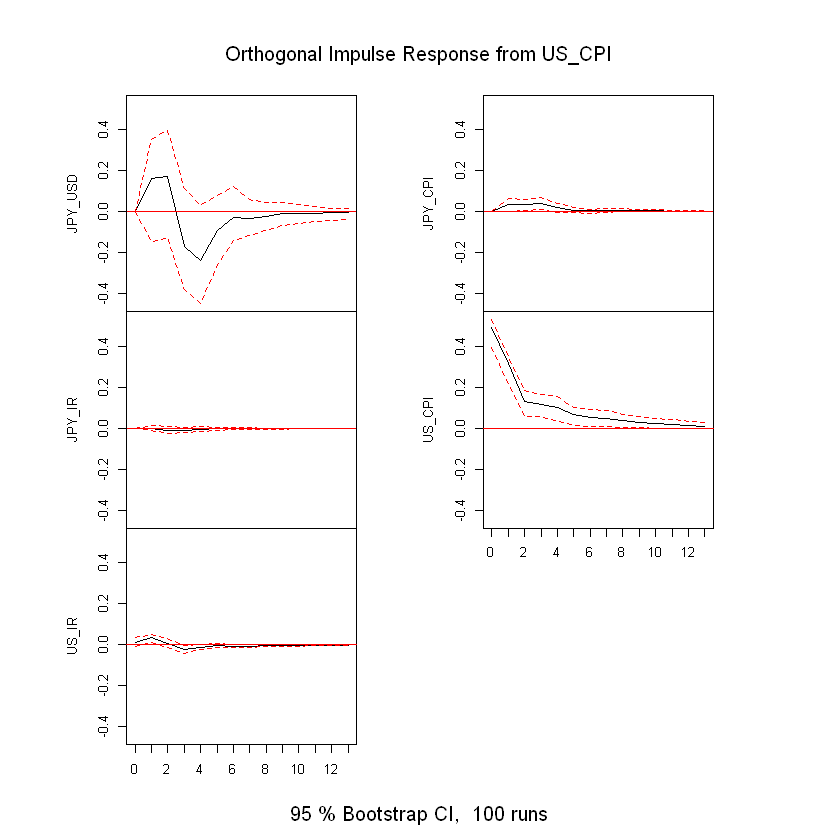

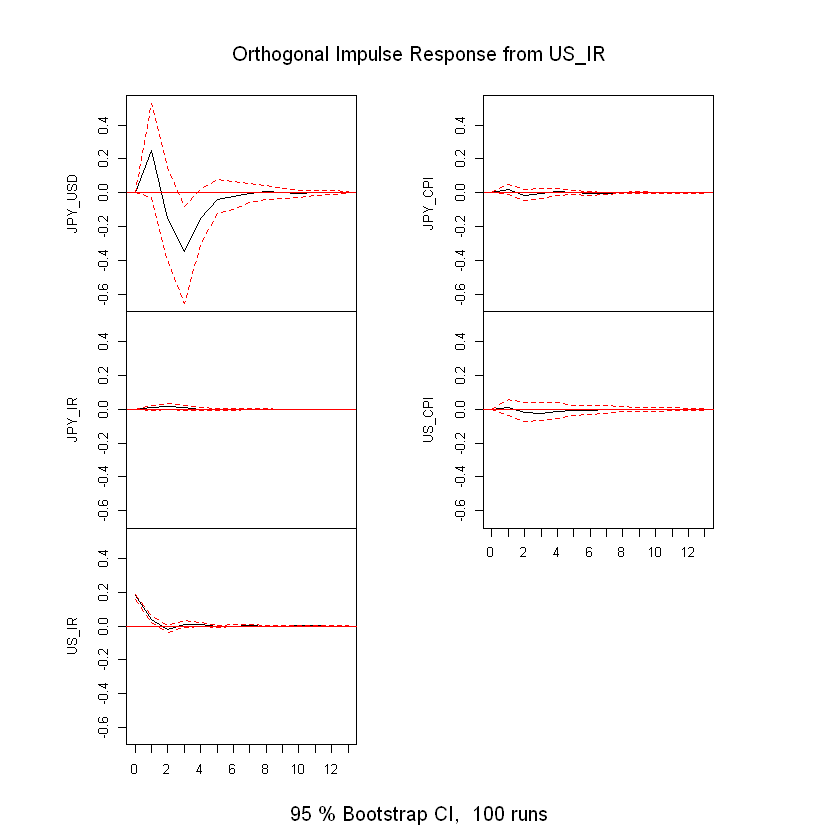

In [24]:
VAR_irf = irf(VAR_model, n.ahead = 13,boot = TRUE, ci = 0.95)
plot(VAR_irf)

## Forecast Variance Decompositon

#### Forecast error decomposition shows that the JPY/USD is determined mostly by itself but in the long run it seems to be explained by all off the included variables equally

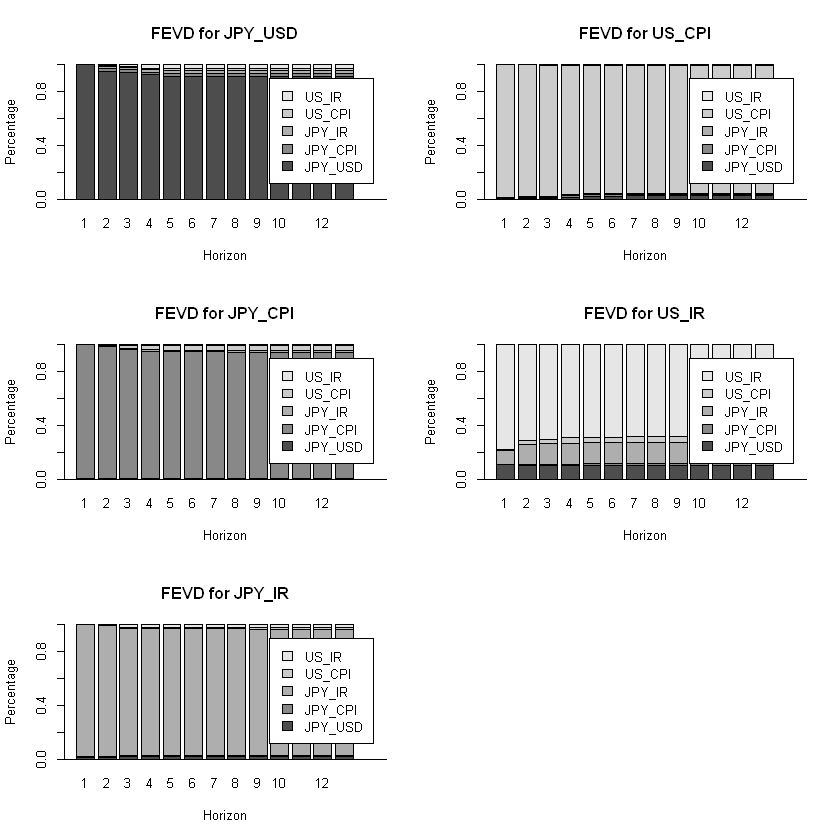

In [25]:
VAR_fevd <- fevd(VAR_model,n.ahead = 13)
plot(VAR_fevd)

### Johnson test with eigen value

In [26]:
jotest1=ca.jo(data, type="eigen", K=2, ecdet="none", spec="longrun")
summary(jotest1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.4296476 0.4031881 0.3172940 0.3067387 0.2432555

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 4 |  96.44  6.50  8.18 11.65
r <= 3 | 126.76 12.91 14.90 19.19
r <= 2 | 132.07 18.90 21.07 25.75
r <= 1 | 178.59 24.78 27.14 32.14
r = 0  | 194.28 30.84 33.32 38.78

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           JPY_USD.l2 JPY_CPI.l2 JPY_IR.l2  US_CPI.l2   US_IR.l2
JPY_USD.l2   1.000000   1.000000  1.000000   1.000000  1.0000000
JPY_CPI.l2 -12.868902  45.292045  7.188671  -1.360866  0.7213208
JPY_IR.l2   60.210002  49.904364 55.769351  53.486389 -4.0046183
US_CPI.l2    4.701533  -5.205188 13.296758 -75.238716  0.2093643
US_IR.l2   -39.040513 -38.591200 95.562599  64.678876 -3.0890532

Weights W:
(This is the loading matrix)



### Johnson test with trace

In [27]:
jotest2=ca.jo(data, type="trace", K=2, ecdet="none", spec="longrun")
summary(jotest2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.4296476 0.4031881 0.3172940 0.3067387 0.2432555

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 4 |  96.44  6.50  8.18 11.65
r <= 3 | 223.20 15.66 17.95 23.52
r <= 2 | 355.26 28.71 31.52 37.22
r <= 1 | 533.85 45.23 48.28 55.43
r = 0  | 728.13 66.49 70.60 78.87

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           JPY_USD.l2 JPY_CPI.l2 JPY_IR.l2  US_CPI.l2   US_IR.l2
JPY_USD.l2   1.000000   1.000000  1.000000   1.000000  1.0000000
JPY_CPI.l2 -12.868902  45.292045  7.188671  -1.360866  0.7213208
JPY_IR.l2   60.210002  49.904364 55.769351  53.486389 -4.0046183
US_CPI.l2    4.701533  -5.205188 13.296758 -75.238716  0.2093643
US_IR.l2   -39.040513 -38.591200 95.562599  64.678876 -3.0890532

Weights W:
(This is the loading matrix)

             JPY_USD.l2   

#### Both tests fail to reject the hypothesis that we have at most 4 cointegration relationships between the variables. Thus, we have more than four common stochastic trends or conintegration between the variables

### Constructing Vector error correction model with r = 4

In [28]:
fit = VECM(data, 1, r = 4, include = "const",estim = "ML", LRinclude = "none")
summary(fit)

#############
###Model VECM 
#############
Full sample size: 348 	End sample size: 346
Number of variables: 5 	Number of estimated slope parameters 50
AIC -3004.952 	BIC -2797.244 	SSR 3190.935
Cointegrating vector (estimated by ML):
        JPY_USD       JPY_CPI       JPY_IR        US_CPI       US_IR
r1 1.000000e+00 -8.615331e-14 1.705303e-13  1.136868e-13 5368.345997
r2 1.387779e-17  1.000000e+00 4.440892e-16  0.000000e+00  -15.834006
r3 4.163336e-17 -1.942890e-15 1.000000e+00 -1.776357e-15  -93.527987
r4 0.000000e+00  1.387779e-17 1.110223e-16  1.000000e+00    4.289557


                 ECT1               ECT2                ECT3              
Equation JPY_USD -0.0862(0.0247)*** -0.1214(0.6441)     -4.8804(1.4065)***
Equation JPY_CPI 0.0013(0.0026)     -1.0055(0.0680)***  0.2516(0.1485).   
Equation JPY_IR  -0.0147(0.0012)*** -0.0167(0.0323)     -0.8411(0.0705)***
Equation US_CPI  0.0031(0.0038)     -0.0141(0.0987)     0.1496(0.2156)    
Equation US_IR   0.0052(0.0017)**   0.0158(0

####  ECT1 and ECT3 are both negative and significant, indicating there is error correction in the long run which are linked to the Japanness and US CPI. this can help construct a more parsiomonous model

#### Short run dynamics of JPY CPI and US interest rate shows significant signs